In [29]:
import networkx as nx
import random
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ipywidgets import GridBox, Layout, interactive_output
from love import calculateODEMatrixVector
random.seed(0)

In [30]:
def random_starting_matrix():
    A = np.ones((4, 4))
    for i in range(4):
        for j in range(4):
            A[i, j] = round(random.uniform(-1, 1), 1)
    return A

def random_starting_vector():
    A = np.ones((4))
    for i in range(4):
        A[i] = round(random.uniform(-1, 1), 1)
    return A

def xy_starting_vector():
    A = np.zeros((4))
    return A

In [31]:
number_of_nodes = 10
G = nx.complete_graph(number_of_nodes)
nx.set_edge_attributes(G, [], "t")
nx.set_edge_attributes(G, [], "data")

In [32]:
#initialize each node with the roamntic parameters (matrix and vector) for a different node
for i in range(number_of_nodes):
    for j in range(number_of_nodes):
        if (i != j):
            G.nodes[i][j] = [random_starting_matrix(), random_starting_vector(), xy_starting_vector()]

for i in range(number_of_nodes):
    for j in range(number_of_nodes):
        if (i != j):
            calculatedODE = calculateODEMatrixVector(G.nodes[i][j][0], G.nodes[i][j][1], G.nodes[i][j][2])
            G[i][j]["data"] = calculatedODE.y
            G[i][j]["t"] = calculatedODE.t
            # G.set_edge_data(i, j, "data", calculatedODE.y)
            # G.set_edge_data(i, j, "t", calculatedODE.t)
            

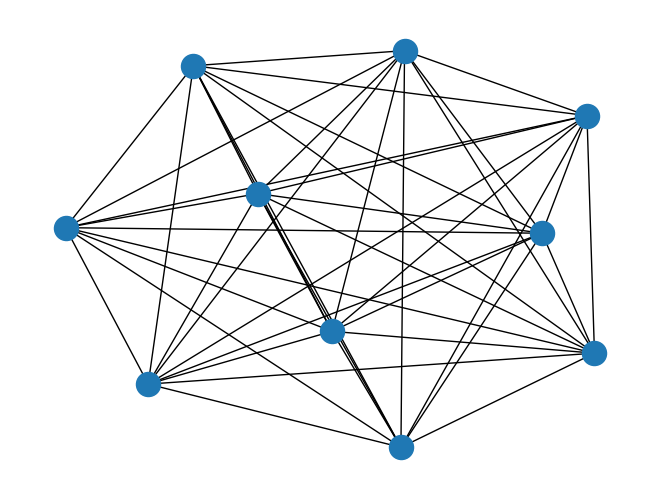

In [33]:
nx.draw(G)

In [34]:
def update_plot(node1, node2, axx, axy, bxx, bxy, cxx, cxy, dxx, dxy, fxy, gxy, ayy, ayx, byy, byx, cyy, cyx, dyy, dyx, fyx, gyx, xi0, yi0, xp0, yp0):
    if (node1 == node2):
        print("Please select two different people")
        return
    
    G.nodes()[int(node1)][int(node2)][0] = np.array([[axx, axy, bxx, bxy], [ayx, ayy, byx, byy], [cxx, cxy, dxx, dxy], [cyx, cyy, dyx, dyy]])
    G.nodes()[int(node1)][int(node2)][1] = np.array([fxy, fyx, gxy, gyx])
    G.nodes()[int(node1)][int(node2)][2] = np.array([xi0, yi0, xp0, yp0])

    calculatedODE = calculateODEMatrixVector(G.nodes()[int(node1)][int(node2)][0], G.nodes()[int(node1)][int(node2)][1], G.nodes()[int(node1)][int(node2)][2])
    G[int(node1)][int(node2)]["data"] = calculatedODE.y
    G[int(node1)][int(node2)]["t"] = calculatedODE.t
    
    xa = G[int(node1)][int(node2)]["data"]
    t = G[int(node1)][int(node2)]["t"]
    
    # # Set up a figure twice as tall as it is wide
    fig = plt.figure(figsize=(20, 20))
    # first subplot
    ax = fig.add_subplot(2, 2, 1)
    # ax.scatter([0, 1, 2, 3], [4, 5, 6, 7])
    ax.scatter(xa[0], xa[1], s=100, cmap='viridis', alpha=0.5, c=t)
    ax.scatter(xa[2], xa[3], s=100, cmap='viridis', alpha=0.5, c=t)
    ax.plot(xa[0],xa[1], c="black", label="Intimacy", alpha=0.5)
    ax.plot(xa[2],xa[3], c="red", label="Passion", alpha=0.5)
    ax.set_xlabel("Person " + node1, fontsize=16)
    ax.set_ylabel("Person " + node2, fontsize=16)
    ax.grid(True)
    ax.legend()

    # second subplot
    ax = fig.add_subplot(2, 2, 2)
    ax.scatter(xa[0], xa[2], s=100, cmap='viridis', alpha=0.5, c=t)
    ax.scatter(xa[1], xa[3], s=100, cmap='viridis', alpha=0.5, c=t)
    ax.plot(xa[0],xa[2], c="black", label="Person " + node2, alpha=0.5)
    ax.plot(xa[1],xa[3], c="red", label="Person " + node1, alpha=0.5)
    ax.set_xlabel('Intimacy', fontsize=16)
    ax.set_ylabel('Passion', fontsize=16)

    ax.grid(True)
    ax.legend()

    # third subplot
    ax = fig.add_subplot(2, 2, 3, projection='3d')
    ax.scatter(xa[0], xa[1], xa[2], c=t, s=100, cmap='viridis', alpha=0.5)
    ax.set_xlabel('Intimacy of Person ' + node1, fontsize=16)
    ax.set_ylabel('Intimacy of Person ' + node2, fontsize=16)
    ax.set_zlabel('Passion of Person ' + node1, fontsize=16)
    ax.grid(True)

    # fourth subplot
    ax = fig.add_subplot(2, 2, 4, projection='3d')
    ax.scatter(xa[0], xa[1], xa[3], c=t, cmap='viridis', alpha=0.5, s=100)
    ax.set_xlabel('Intimacy of Person' + node1, fontsize=16)
    ax.set_ylabel('Intimacy of Person ' + node2, fontsize=16)
    ax.set_zlabel('Passion of Person ' + node2, fontsize=16)
    ax.grid(True)

    plt.show()

In [37]:
node1 = widgets.Dropdown(options=[str(i) for i in range(number_of_nodes)], value='0', description='Person:')
node2 = widgets.Dropdown(options=[str(i) for i in range(number_of_nodes)], value='1', description='Person:') 

slider_style = {'description_width': 'initial'} 
slider_layout = Layout(width='auto')
# A
# G.nodes()[0][1][0][0][0] means select node 0, node 1, matrix A, row 0, column 0
axx= G.nodes()[0][1][0][0][0]; axy= G.nodes()[0][1][0][0][1]; bxx= G.nodes()[0][1][0][0][2]; bxy= G.nodes()[0][1][0][0][3]
ayx= G.nodes()[0][1][0][1][0]; ayy= G.nodes()[0][1][0][1][1]; byx= G.nodes()[0][1][0][1][2]; byy= G.nodes()[0][1][0][1][3]
cxx= G.nodes()[0][1][0][2][0]; cxy= G.nodes()[0][1][0][2][1]; dxx= G.nodes()[0][1][0][2][2]; dxy= G.nodes()[0][1][0][2][3]
cyx= G.nodes()[0][1][0][3][0]; cyy= G.nodes()[0][1][0][3][1]; dyx= G.nodes()[0][1][0][3][2]; dyy= G.nodes()[0][1][0][3][3]
#B
# G.nodes()[0][1][1][0] means select node 0, node 1, vector B, row 0
fxy=G.nodes()[0][1][1][0]; fyx=G.nodes()[0][1][1][1]; gxy=G.nodes()[0][1][1][2]; gyx=G.nodes()[0][1][1][3]
# C
# G.nodes()[0][1][2][0] means select node 0, node 1, vector C, row 0
xi0=G.nodes()[0][1][2][0]; yi0=G.nodes()[0][1][2][1]; xp0=G.nodes()[0][1][2][2]; yp0=G.nodes()[0][1][2][3]

# Parameters
axx_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=axx, description='axx', style=slider_style, layout=slider_layout)
axy_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=axy, description='axy', style=slider_style, layout=slider_layout)
bxx_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=bxx, description='bxx', style=slider_style, layout=slider_layout)
bxy_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=bxy, description='bxy', style=slider_style, layout=slider_layout)
ayx_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=ayx, description='ayx', style=slider_style, layout=slider_layout)
ayy_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=ayy, description='ayy', style=slider_style, layout=slider_layout)
byx_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=byx, description='byx', style=slider_style, layout=slider_layout)
byy_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=byy, description='byy', style=slider_style, layout=slider_layout)
cxx_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=cxx, description='cxx', style=slider_style, layout=slider_layout)
cxy_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=cxy, description='cxy', style=slider_style, layout=slider_layout)
dxx_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=dxx, description='dxx', style=slider_style, layout=slider_layout)
dxy_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=dxy, description='dxy', style=slider_style, layout=slider_layout)
cyx_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=cyx, description='cyx', style=slider_style, layout=slider_layout)
cyy_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=cyy, description='cyy', style=slider_style, layout=slider_layout)
dyx_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=dyx, description='dyx', style=slider_style, layout=slider_layout)
dyy_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=dyy, description='dyy', style=slider_style, layout=slider_layout)

fxy_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=fxy, description='fxy', style=slider_style, layout=slider_layout)
fyx_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=fyx, description='fyx', style=slider_style, layout=slider_layout)
gxy_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=gxy, description='gxy', style=slider_style, layout=slider_layout)
gyx_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=gyx, description='gyx', style=slider_style, layout=slider_layout)

xi0_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=xi0, description='xi0', style=slider_style, layout=slider_layout)
yi0_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=yi0, description='yi0', style=slider_style, layout=slider_layout)
xp0_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=xp0, description='xp0', style=slider_style, layout=slider_layout)
yp0_slider = widgets.FloatSlider(min=-1.0, max=1.0, step=0.1, value=yp0, description='yp0', style=slider_style, layout=slider_layout)

# display(node1, node2, axx, axy, bxx, bxy, cxx, cxy, dxx, dxy, fxy, gxy, ayy, ayx, byy, byx, cyy, cyx, dyy, dyx, fyx, gyx, xi0, yi0, xp0, yp0)

def update_sliders(change):
    node1_value = int(node1.value)
    node2_value = int(node2.value)
    if (node1_value == node2_value):
        print("Please select two different people")
        return

    axx_slider.value = G.nodes()[node1_value][node2_value][0][0][0]
    axy_slider.value = G.nodes()[node1_value][node2_value][0][0][1]
    bxx_slider.value = G.nodes()[node1_value][node2_value][0][0][2]
    bxy_slider.value = G.nodes()[node1_value][node2_value][0][0][3]
    ayx_slider.value = G.nodes()[node1_value][node2_value][0][1][0]
    ayy_slider.value = G.nodes()[node1_value][node2_value][0][1][1]
    byx_slider.value = G.nodes()[node1_value][node2_value][0][1][2]
    byy_slider.value = G.nodes()[node1_value][node2_value][0][1][3]
    cxx_slider.value = G.nodes()[node1_value][node2_value][0][2][0]
    cxy_slider.value = G.nodes()[node1_value][node2_value][0][2][1]
    dxx_slider.value = G.nodes()[node1_value][node2_value][0][2][2]
    dxy_slider.value = G.nodes()[node1_value][node2_value][0][2][3]
    cyx_slider.value = G.nodes()[node1_value][node2_value][0][3][0]
    cyy_slider.value = G.nodes()[node1_value][node2_value][0][3][1]
    dyx_slider.value = G.nodes()[node1_value][node2_value][0][3][2]
    dyy_slider.value = G.nodes()[node1_value][node2_value][0][3][3]

    fxy_slider.value = G.nodes()[node1_value][node2_value][1][0]
    fyx_slider.value = G.nodes()[node1_value][node2_value][1][1]
    gxy_slider.value = G.nodes()[node1_value][node2_value][1][2]
    gyx_slider.value = G.nodes()[node1_value][node2_value][1][3]

    xi0_slider.value = G.nodes()[node1_value][node2_value][2][0]
    yi0_slider.value = G.nodes()[node1_value][node2_value][2][1]
    xp0_slider.value = G.nodes()[node1_value][node2_value][2][2]
    yp0_slider.value = G.nodes()[node1_value][node2_value][2][3]

node1.observe(update_sliders, names='value')
node2.observe(update_sliders, names='value')

sliders = [node1, node2, 
           axx_slider,axy_slider,bxx_slider,bxy_slider,ayx_slider,ayy_slider,byx_slider,byy_slider, cxx_slider,cxy_slider,dxx_slider,dxy_slider,cyx_slider,cyy_slider,dyx_slider,dyy_slider,fxy_slider,fyx_slider,gxy_slider,gyx_slider,xi0_slider,yi0_slider,xp0_slider,yp0_slider]
grid = GridBox(sliders, layout=Layout(
    width='100%',
    grid_template_columns='repeat(5, 20%)',  
    grid_gap='20px 20px'
))
interactive_plot = interactive_output(update_plot, {
    'node1': node1, 'node2': node2, 'axx': axx_slider, 'axy': axy_slider, 'bxx': bxx_slider, 'bxy': bxy_slider, 'cxx': cxx_slider, 'cxy': cxy_slider, 'dxx': dxx_slider, 'dxy': dxy_slider, 'fxy': fxy_slider, 'gxy': gxy_slider, 'ayy': ayy_slider, 'ayx': ayx_slider, 'byy': byy_slider, 'byx': byx_slider, 'cyy': cyy_slider, 'cyx': cyx_slider, 'dyy': dyy_slider, 'dyx': dyx_slider, 'fyx': fyx_slider, 'gyx': gyx_slider, 'xi0': xi0_slider, 'yi0': yi0_slider, 'xp0': xp0_slider, 'yp0': yp0_slider
})

Please select two different people
here


here


In [38]:
widgets.VBox([grid, interactive_plot])